Introduction on VGGNet
The full name of VGG is the Visual Geometry Group, which belongs to the Department of Science and Engineering of Oxford University. It has released a series of convolutional network models beginning with VGG, which can be applied to face recognition and image classification, from VGG16 to VGG19. The original purpose of VGG's research on the depth of convolutional networks is to understand how the depth of convolutional networks affects the accuracy and accuracy of large-scale image classification and recognition. -Deep-16 CNN), in order to deepen the number of network layers and to avoid too many parameters, a small 3x3 convolution kernel is used in all layers.




The network structure
The input of VGG is set to an RGB image of 224x244 size. The average RGB value is calculated for all images on the training set image, and then the image is input as an input to the VGG convolution network. A 3x3 or 1x1 filter is used, and the convolution step is fixed. . There are 3 VGG fully connected layers, which can vary from VGG11 to VGG19 according to the total number of convolutional layers + fully connected layers. The minimum VGG11 has 8 convolutional layers and 3 fully connected layers. The maximum VGG19 has 16 convolutional layers. +3 fully connected layers. In addition, the VGG network is not followed by a pooling layer behind each convolutional layer, or a total of 5 pooling layers distributed under different convolutional layers. The following figure is VGG Structure diagram:

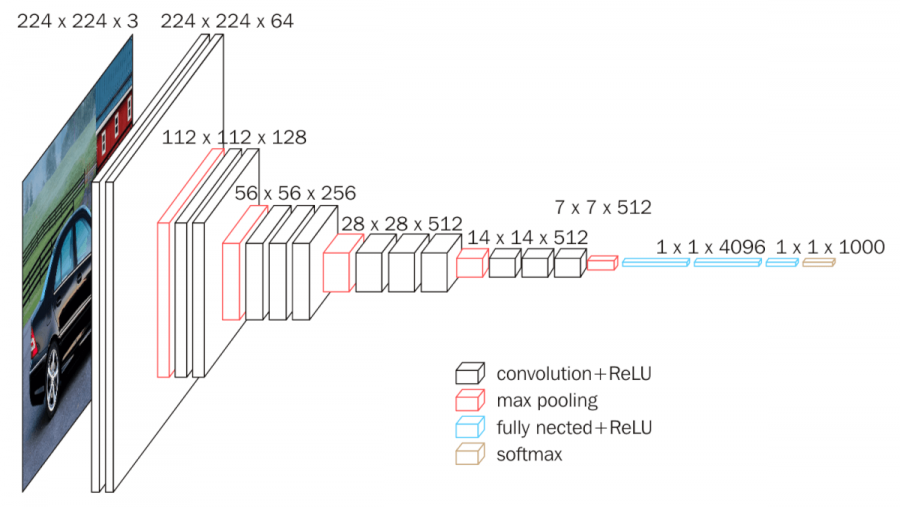

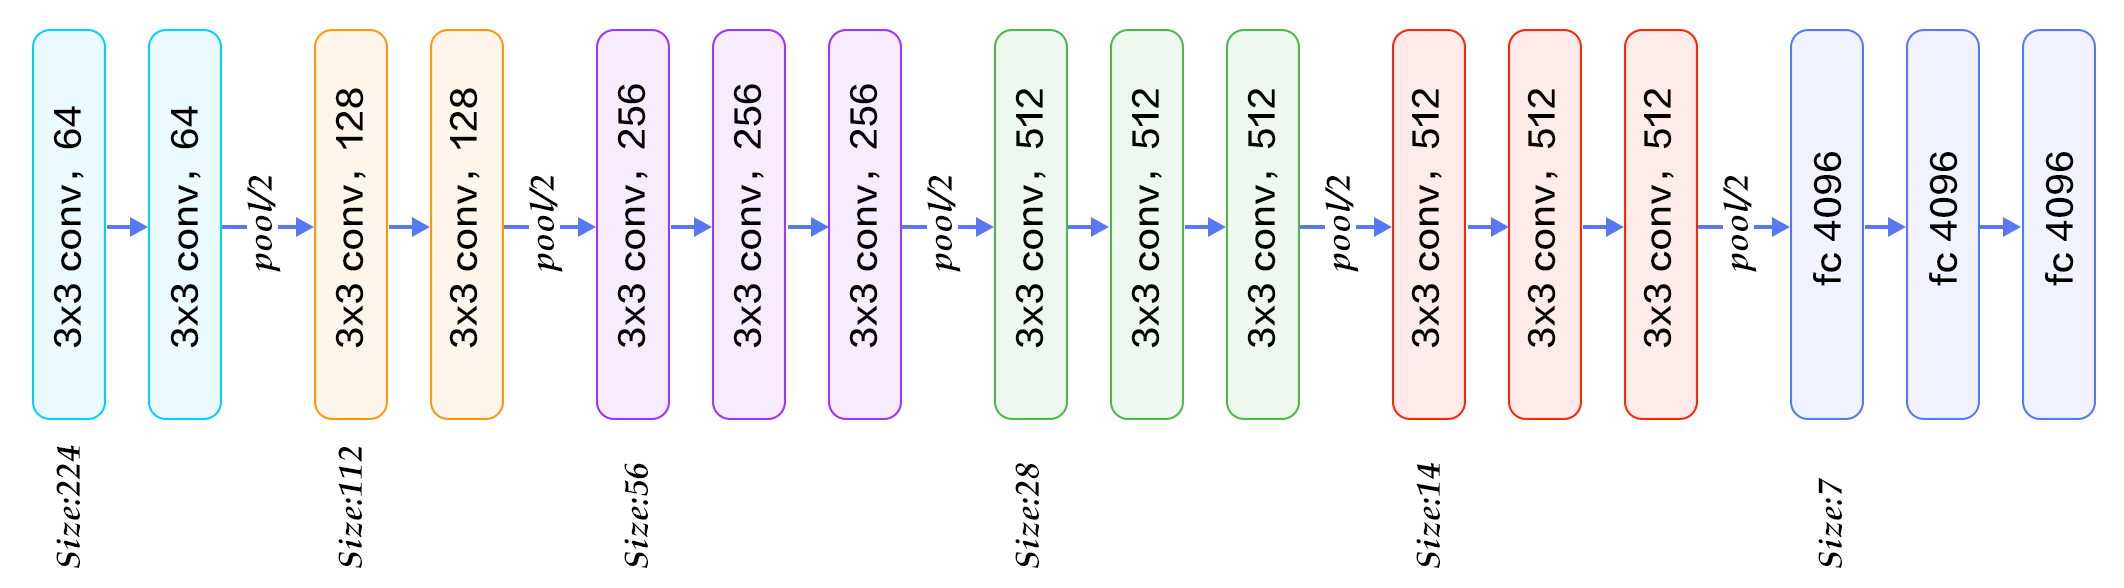


VGG16 contains 16 layers and VGG19 contains 19 layers. A series of VGGs are exactly the same in the last three fully connected layers. The overall structure includes 5 sets of convolutional layers, followed by a MaxPool. The difference is that more and more cascaded convolutional layers are included in the five sets of convolutional layers .


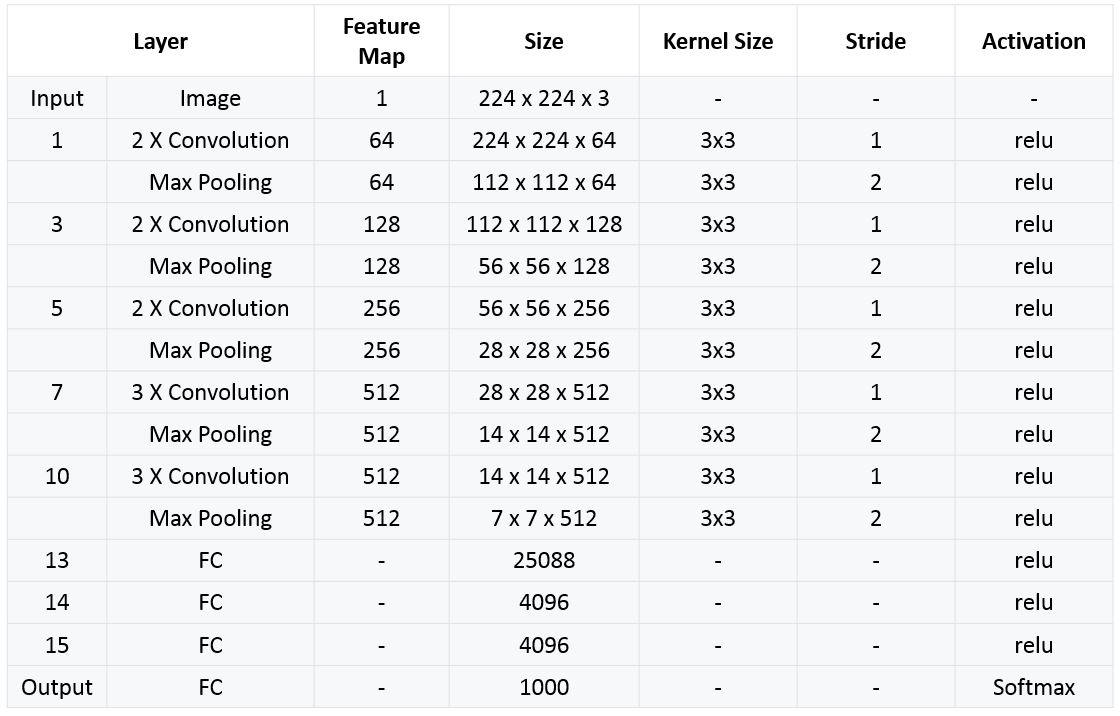

# In this above image kernel size for max pooling wrong. For correct take reference from buttom image

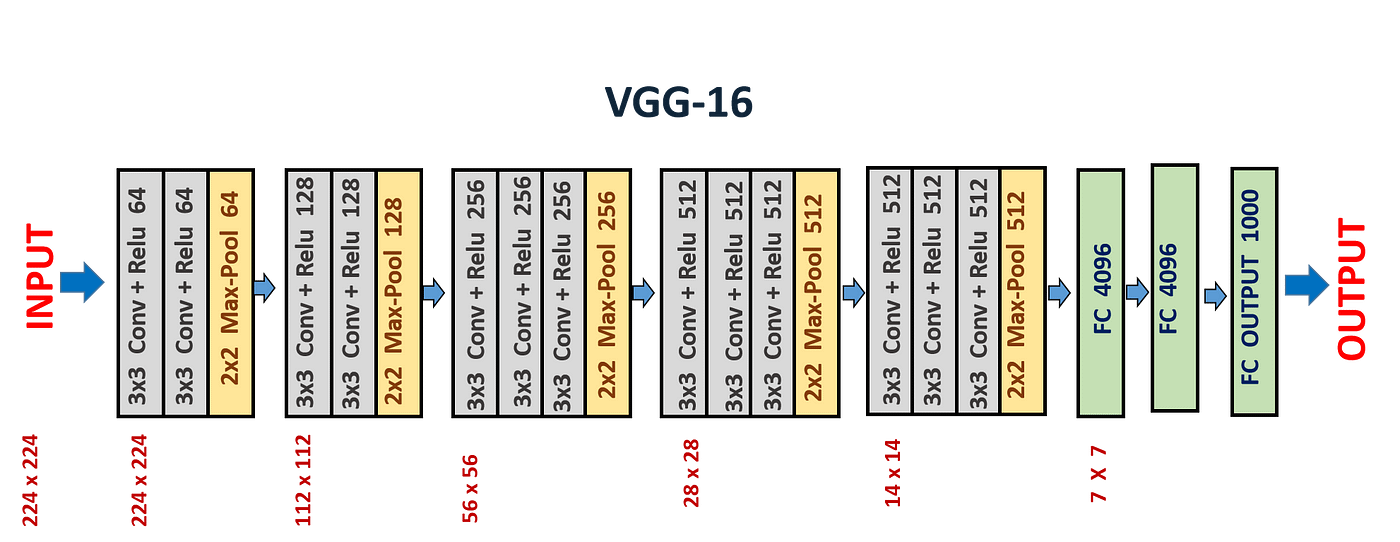


Each convolutional layer in AlexNet contains only one convolution, and the size of the convolution kernel is 11 11 ,. In VGGNet, each convolution layer contains 2 to 4 convolution operations. The size of the convolution kernel is 3 3, the convolution step size is 1, the pooling kernel is 2 * 2, and the step size is 2. The most obvious improvement of VGGNet is to reduce the size of the convolution kernel and increase the number of convolution layers.

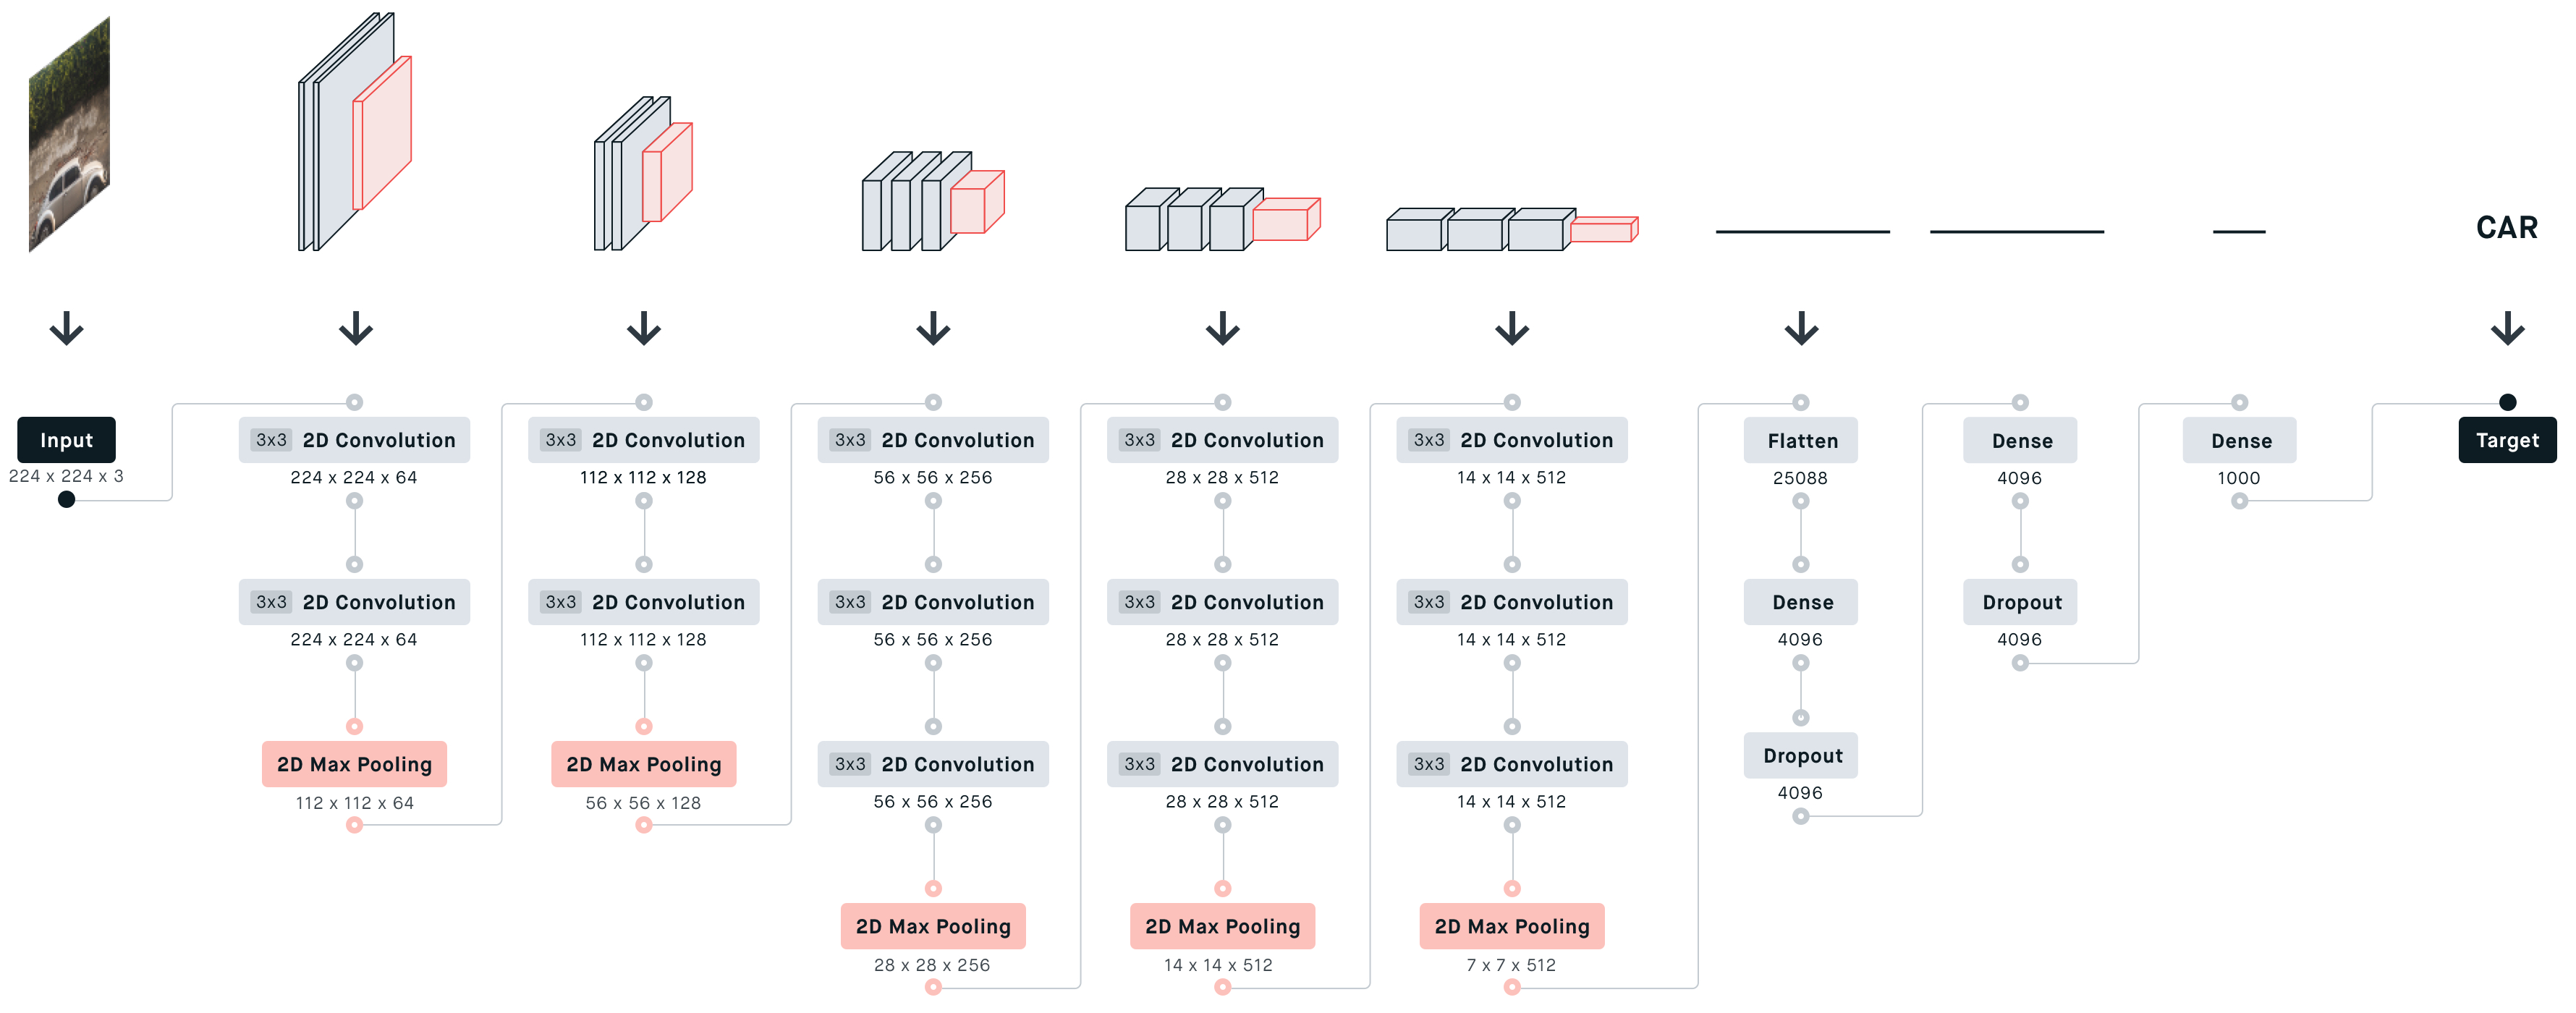

Using multiple convolution layers with smaller convolution kernels instead of a larger convolution layer with convolution kernels can reduce parameters on the one hand, and the author believes that it is equivalent to more non-linear mapping, which increases the Fit expression ability.

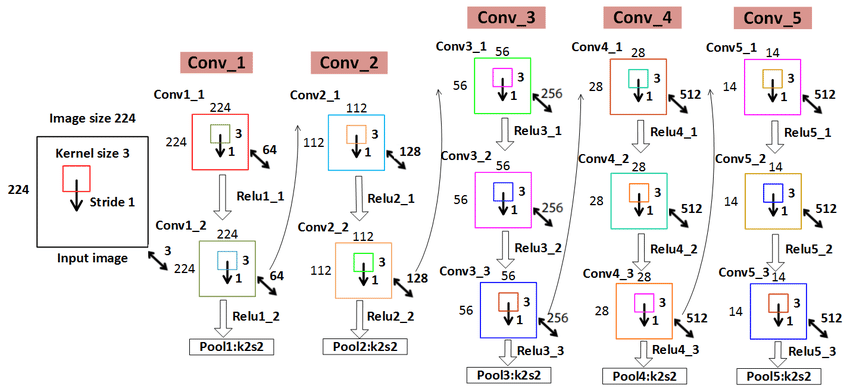

Two consecutive 3 3 convolutions are equivalent to a 5 5 receptive field, and three are equivalent to 7 7. The advantages of using three 3 3 convolutions instead of one 7 7 convolution are twofold : one, including three ReLu layers instead of one , makes the decision function more discriminative; and two, reducing parameters . For example, the input and output are all C channels. 3 convolutional layers using 3 3 require 3 (3 3 C C) = 27 C C, and 1 convolutional layer using 7 7 requires 7 7 C C = 49C C. This can be seen as applying a kind of regularization to the 7 7 convolution, so that it is decomposed into three 3 3 convolutions.

The 1 1 convolution layer is mainly to increase the non-linearity of the decision function without affecting the receptive field of the convolution layer. Although the 1 1 convolution operation is linear, ReLu adds non-linearity.



# Network Configuration
Table 1 shows all network configurations. These networks follow the same design principles, but differ in depth.


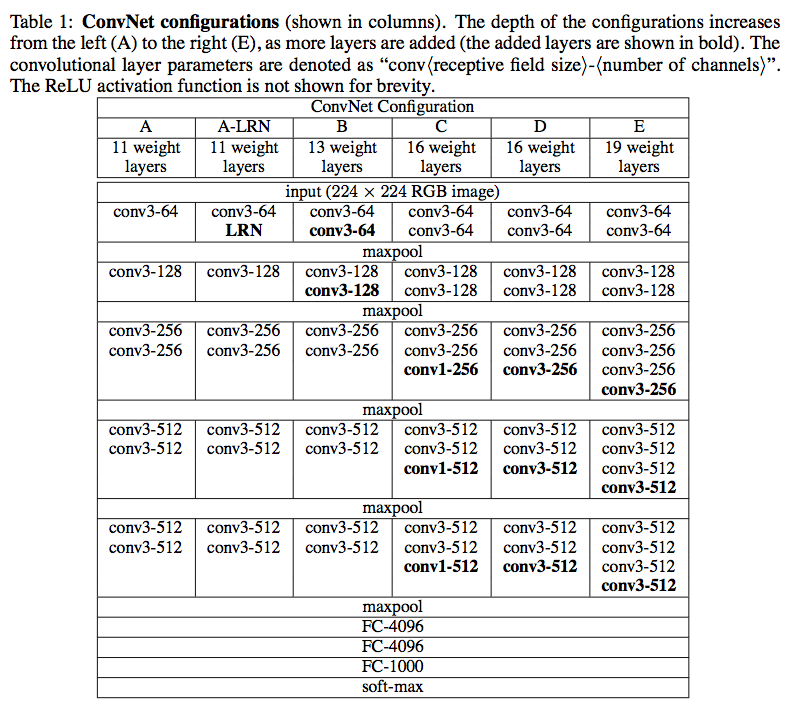


This picture is definitely used when introducing VGG16. This picture contains a lot of information. My interpretation here may be limited. If you have any supplements, please leave a message.

Number 1 : This is a comparison chart of 6 networks. From A to E, the network is getting deeper. Several layers have been added to verify the effect.

Number 2 : Each column explains the structure of each network in detail.

Number 3: This is a correct way to do experiments, that is, use the simplest method to solve the problem , and then gradually optimize for the problems that occur.



Network A: First mention a shallow network, this network can easily converge on ImageNet. And then?
Network A-LRN: Add something that someone else (AlexNet) has experimented to say is effective (LRN), but it seems useless. And then?
Network B: Then try adding 2 layers? Seems to be effective. And then?
Network C: Add two more layers of 1 1 convolution, and it will definitely converge. The effect seems to be better. A little excited. And then?
Network D: Change the 1 1 convolution kernel to 3 * 3. Try it. The effect has improved again. Seems to be the best (2014).




# Training

* The optimization method is a stochastic gradient descent SGD + momentum (0.9) with momentum. The batch size is 256.

* Regularization : L2 regularization is used, and the weight decay is 5e-4. Dropout is after the first two fully connected layers, p = 0.5.

* Although it is deeper and has more parameters than the AlexNet network, we speculate that VGGNet can converge in less cycles for two reasons: one, the greater depth and smaller convolutions bring implicit regularization ; Second, some layers of pre-training.

* Parameter initialization : For a shallow A network, parameters are randomly initialized, the weight w is sampled from N (0, 0.01), and the bias is initialized to 0. Then, for deeper networks, first the first four convolutional layers and three fully connected layers are initialized with the parameters of the A network. However, it was later discovered that it is also possible to directly initialize it without using pre-trained parameters.

*  In order to obtain a 224 * 224 input image, each rescaled image is randomly cropped in each SGD iteration. In order to enhance the data set, the cropped image is also randomly flipped horizontally and RGB color shifted.


# Summary of VGGNet improvement points
 

* A smaller 3 3 convolution kernel and a deeper network are used . The stack of two 3 3 convolution kernels is relative to the field of view of a 5 5 convolution kernel, and the stack of three 3 3 convolution kernels is equivalent to the field of view of a 7 7 convolution kernel. In this way, there can be fewer parameters (3 stacked 3 3 structures have only 7 7 structural parameters (3 3 3) / (7 7) = 55%); on the other hand, they have more The non-linear transformation increases the ability of CNN to learn features.  

* In the convolutional structure of VGGNet, a 1 * 1 convolution kernel is introduced. Without affecting the input and output dimensions, non-linear transformation is introduced to increase the expressive power of the network and reduce the amount of calculation.  

* During training, first train a simple (low-level) VGGNet A-level network, and then use the weights of the A network to initialize the complex models that follow to speed up the convergence of training .


# Q1: Why can 3 3x3 convolutions replace 7x7 convolutions?

<div class="mx-auto flex flex-1 gap-4 text-base md:gap-5 lg:gap-6 md:max-w-3xl lg:max-w-[40rem] xl:max-w-[48rem]"><div class="flex-shrink-0 flex flex-col relative items-end"><div><div class="pt-0"><div class="gizmo-bot-avatar flex h-8 w-8 items-center justify-center overflow-hidden rounded-full"><div class="relative p-1 rounded-sm flex items-center justify-center bg-token-main-surface-primary text-token-text-primary h-8 w-8"><svg width="41" height="41" viewBox="0 0 41 41" fill="none" xmlns="http://www.w3.org/2000/svg" class="icon-md" role="img"><text x="-9999" y="-9999">ChatGPT</text><path d="M37.5324 16.8707C37.9808 15.5241 38.1363 14.0974 37.9886 12.6859C37.8409 11.2744 37.3934 9.91076 36.676 8.68622C35.6126 6.83404 33.9882 5.3676 32.0373 4.4985C30.0864 3.62941 27.9098 3.40259 25.8215 3.85078C24.8796 2.7893 23.7219 1.94125 22.4257 1.36341C21.1295 0.785575 19.7249 0.491269 18.3058 0.500197C16.1708 0.495044 14.0893 1.16803 12.3614 2.42214C10.6335 3.67624 9.34853 5.44666 8.6917 7.47815C7.30085 7.76286 5.98686 8.3414 4.8377 9.17505C3.68854 10.0087 2.73073 11.0782 2.02839 12.312C0.956464 14.1591 0.498905 16.2988 0.721698 18.4228C0.944492 20.5467 1.83612 22.5449 3.268 24.1293C2.81966 25.4759 2.66413 26.9026 2.81182 28.3141C2.95951 29.7256 3.40701 31.0892 4.12437 32.3138C5.18791 34.1659 6.8123 35.6322 8.76321 36.5013C10.7141 37.3704 12.8907 37.5973 14.9789 37.1492C15.9208 38.2107 17.0786 39.0587 18.3747 39.6366C19.6709 40.2144 21.0755 40.5087 22.4946 40.4998C24.6307 40.5054 26.7133 39.8321 28.4418 38.5772C30.1704 37.3223 31.4556 35.5506 32.1119 33.5179C33.5027 33.2332 34.8167 32.6547 35.9659 31.821C37.115 30.9874 38.0728 29.9178 38.7752 28.684C39.8458 26.8371 40.3023 24.6979 40.0789 22.5748C39.8556 20.4517 38.9639 18.4544 37.5324 16.8707ZM22.4978 37.8849C20.7443 37.8874 19.0459 37.2733 17.6994 36.1501C17.7601 36.117 17.8666 36.0586 17.936 36.0161L25.9004 31.4156C26.1003 31.3019 26.2663 31.137 26.3813 30.9378C26.4964 30.7386 26.5563 30.5124 26.5549 30.2825V19.0542L29.9213 20.998C29.9389 21.0068 29.9541 21.0198 29.9656 21.0359C29.977 21.052 29.9842 21.0707 29.9867 21.0902V30.3889C29.9842 32.375 29.1946 34.2791 27.7909 35.6841C26.3872 37.0892 24.4838 37.8806 22.4978 37.8849ZM6.39227 31.0064C5.51397 29.4888 5.19742 27.7107 5.49804 25.9832C5.55718 26.0187 5.66048 26.0818 5.73461 26.1244L13.699 30.7248C13.8975 30.8408 14.1233 30.902 14.3532 30.902C14.583 30.902 14.8088 30.8408 15.0073 30.7248L24.731 25.1103V28.9979C24.7321 29.0177 24.7283 29.0376 24.7199 29.0556C24.7115 29.0736 24.6988 29.0893 24.6829 29.1012L16.6317 33.7497C14.9096 34.7416 12.8643 35.0097 10.9447 34.4954C9.02506 33.9811 7.38785 32.7263 6.39227 31.0064ZM4.29707 13.6194C5.17156 12.0998 6.55279 10.9364 8.19885 10.3327C8.19885 10.4013 8.19491 10.5228 8.19491 10.6071V19.808C8.19351 20.0378 8.25334 20.2638 8.36823 20.4629C8.48312 20.6619 8.64893 20.8267 8.84863 20.9404L18.5723 26.5542L15.206 28.4979C15.1894 28.5089 15.1703 28.5155 15.1505 28.5173C15.1307 28.5191 15.1107 28.516 15.0924 28.5082L7.04046 23.8557C5.32135 22.8601 4.06716 21.2235 3.55289 19.3046C3.03862 17.3858 3.30624 15.3413 4.29707 13.6194ZM31.955 20.0556L22.2312 14.4411L25.5976 12.4981C25.6142 12.4872 25.6333 12.4805 25.6531 12.4787C25.6729 12.4769 25.6928 12.4801 25.7111 12.4879L33.7631 17.1364C34.9967 17.849 36.0017 18.8982 36.6606 20.1613C37.3194 21.4244 37.6047 22.849 37.4832 24.2684C37.3617 25.6878 36.8382 27.0432 35.9743 28.1759C35.1103 29.3086 33.9415 30.1717 32.6047 30.6641C32.6047 30.5947 32.6047 30.4733 32.6047 30.3889V21.188C32.6066 20.9586 32.5474 20.7328 32.4332 20.5338C32.319 20.3348 32.154 20.1698 31.955 20.0556ZM35.3055 15.0128C35.2464 14.9765 35.1431 14.9142 35.069 14.8717L27.1045 10.2712C26.906 10.1554 26.6803 10.0943 26.4504 10.0943C26.2206 10.0943 25.9948 10.1554 25.7963 10.2712L16.0726 15.8858V11.9982C16.0715 11.9783 16.0753 11.9585 16.0837 11.9405C16.0921 11.9225 16.1048 11.9068 16.1207 11.8949L24.1719 7.25025C25.4053 6.53903 26.8158 6.19376 28.2383 6.25482C29.6608 6.31589 31.0364 6.78077 32.2044 7.59508C33.3723 8.40939 34.2842 9.53945 34.8334 10.8531C35.3826 12.1667 35.5464 13.6095 35.3055 15.0128ZM14.2424 21.9419L10.8752 19.9981C10.8576 19.9893 10.8423 19.9763 10.8309 19.9602C10.8195 19.9441 10.8122 19.9254 10.8098 19.9058V10.6071C10.8107 9.18295 11.2173 7.78848 11.9819 6.58696C12.7466 5.38544 13.8377 4.42659 15.1275 3.82264C16.4173 3.21869 17.8524 2.99464 19.2649 3.1767C20.6775 3.35876 22.0089 3.93941 23.1034 4.85067C23.0427 4.88379 22.937 4.94215 22.8668 4.98473L14.9024 9.58517C14.7025 9.69878 14.5366 9.86356 14.4215 10.0626C14.3065 10.2616 14.2466 10.4877 14.2479 10.7175L14.2424 21.9419ZM16.071 17.9991L20.4018 15.4978L24.7325 17.9975V22.9985L20.4018 25.4983L16.071 22.9985V17.9991Z" fill="currentColor"></path></svg></div></div></div></div></div><div class="group/conversation-turn relative flex w-full min-w-0 flex-col agent-turn"><div class="flex-col gap-1 md:gap-3"><div class="flex flex-grow flex-col max-w-full"><div data-message-author-role="assistant" data-message-id="7033eabb-716d-4c9d-bc0f-f5d6300f8a0e" dir="auto" class="min-h-[20px] text-message flex w-full flex-col items-end gap-2 whitespace-pre-wrap break-words [.text-message+&amp;]:mt-5 overflow-x-auto"><div class="flex w-full flex-col gap-1 empty:hidden first:pt-[3px]"><div class="markdown prose w-full break-words dark:prose-invert dark"><p>Using three 3x3 convolutional layers in place of a single 7x7 convolutional layer is a technique that offers several advantages, particularly in terms of efficiency and performance. Here’s why this substitution is beneficial, especially in the context of VGG16:</p><h3>1. <strong>Parameter Efficiency:</strong></h3><ul><li><strong>7x7 Convolution:</strong> A single 7x7 convolutional layer with <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>C</mi></mrow><annotation encoding="application/x-tex">C</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.07153em;">C</span></span></span></span> input and output channels has <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mn>49</mn><msup><mi>C</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">49C^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord">49</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.07153em;">C</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span> parameters (since <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mn>7</mn><mo>×</mo><mn>7</mn><mo>=</mo><mn>49</mn></mrow><annotation encoding="application/x-tex">7 \times 7 = 49</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.7278em; vertical-align: -0.0833em;"></span><span class="mord">7</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">×</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 0.6444em;"></span><span class="mord">7</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 0.6444em;"></span><span class="mord">49</span></span></span></span>).</li><li><strong>Three 3x3 Convolutions:</strong> Each 3x3 convolutional layer has <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mn>9</mn><msup><mi>C</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">9C^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord">9</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.07153em;">C</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span> parameters, and three such layers have <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mn>27</mn><msup><mi>C</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">27C^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord">27</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.07153em;">C</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span> parameters in total (since <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mn>3</mn><mo>×</mo><mn>9</mn><mo>=</mo><mn>27</mn></mrow><annotation encoding="application/x-tex">3 \times 9 = 27</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.7278em; vertical-align: -0.0833em;"></span><span class="mord">3</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">×</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 0.6444em;"></span><span class="mord">9</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 0.6444em;"></span><span class="mord">27</span></span></span></span>).</li><li><strong>Reduction in Parameters:</strong> By using three 3x3 layers, the number of parameters is reduced from <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mn>49</mn><msup><mi>C</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">49C^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord">49</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.07153em;">C</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span> to <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mn>27</mn><msup><mi>C</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">27C^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord">27</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.07153em;">C</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span>, making the model more parameter-efficient.</li></ul><h3>2. <strong>Non-linearity and Expressiveness:</strong></h3><ul><li><strong>Non-linear Activations:</strong> Each convolutional layer is typically followed by a non-linear activation function (e.g., ReLU). Using three 3x3 convolutions introduces non-linearity three times instead of just once with a 7x7 convolution.</li><li><strong>Increased Expressiveness:</strong> Multiple layers with non-linearities allow the network to learn more complex and abstract features. This can improve the model's ability to capture intricate patterns in the data.</li></ul><h3>3. <strong>Effective Receptive Field:</strong></h3><ul><li><strong>Receptive Field:</strong> The receptive field of a neuron refers to the region of the input image that affects that neuron's output.</li><li><strong>Three 3x3 Layers:</strong> Stacking three 3x3 convolutional layers results in an effective receptive field of <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mn>7</mn><mo>×</mo><mn>7</mn></mrow><annotation encoding="application/x-tex">7 \times 7</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.7278em; vertical-align: -0.0833em;"></span><span class="mord">7</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">×</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 0.6444em;"></span><span class="mord">7</span></span></span></span> (when considering the cumulative effect), similar to a single 7x7 layer. This is because each 3x3 layer expands the receptive field by a small amount, and successive layers build upon each other.</li></ul><h3>4. <strong>Computational Efficiency:</strong></h3><ul><li><strong>Fewer Operations:</strong> While the total number of multiplications and additions might seem higher for three 3x3 convolutions compared to one 7x7 convolution, the smaller filter size allows for more efficient memory access patterns and better use of modern hardware accelerators (like GPUs).</li><li><strong>Better Performance:</strong> In practice, deep learning frameworks and hardware are optimized for smaller convolutions, resulting in better overall performance for three 3x3 layers compared to one 7x7 layer.</li></ul><h3>5. <strong>Regularization:</strong></h3><ul><li><strong>Implicit Regularization:</strong> Using multiple smaller convolutional layers can act as a form of implicit regularization, reducing the risk of overfitting. This is because the model must learn to combine simpler features to create complex patterns, rather than directly learning complex patterns with a single large filter.</li></ul><h3>Summary</h3><p>Replacing a 7x7 convolution with three 3x3 convolutions in VGG16 offers several benefits:</p><ul><li>Reduced number of parameters.</li><li>Increased depth with additional non-linearities, enhancing model expressiveness.</li><li>Equivalent effective receptive field.</li><li>Improved computational efficiency due to hardware optimizations.</li><li>Implicit regularization, potentially leading to better generalization.</li></ul><p>These advantages contribute to the improved performance and popularity of the VGG16 architecture in deep learning applications.</p></div></div></div></div><div class="mt-1 flex gap-3 empty:hidden -ml-2"><div class="items-center justify-start rounded-xl p-1 z-10 -mt-1 bg-token-main-surface-primary md:absolute md:border md:border-token-border-light md:hidden"><div class="flex items-center"><span class="" data-state="closed"><button class="rounded-lg text-token-text-secondary hover:bg-token-main-surface-secondary"><span class="flex h-[30px] w-[30px] items-center justify-center"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-md-heavy"><path fill="currentColor" fill-rule="evenodd" d="M11 4.91a.5.5 0 0 0-.838-.369L6.676 7.737A1 1 0 0 1 6 8H4a1 1 0 0 0-1 1v6a1 1 0 0 0 1 1h2a1 1 0 0 1 .676.263l3.486 3.196A.5.5 0 0 0 11 19.09zM8.81 3.067C10.415 1.597 13 2.735 13 4.91v14.18c0 2.175-2.586 3.313-4.19 1.843L5.612 18H4a3 3 0 0 1-3-3V9a3 3 0 0 1 3-3h1.611zm11.507 3.29a1 1 0 0 1 1.355.401A10.96 10.96 0 0 1 23 12c0 1.85-.458 3.597-1.268 5.13a1 1 0 1 1-1.768-.934A8.96 8.96 0 0 0 21 12a8.96 8.96 0 0 0-1.085-4.287 1 1 0 0 1 .402-1.356M15.799 7.9a1 1 0 0 1 1.4.2 6.48 6.48 0 0 1 1.3 3.9c0 1.313-.39 2.537-1.06 3.56a1 1 0 0 1-1.673-1.096A4.47 4.47 0 0 0 16.5 12a4.47 4.47 0 0 0-.9-2.7 1 1 0 0 1 .2-1.4" clip-rule="evenodd"></path></svg></span></button></span><span class="" data-state="closed"><button class="rounded-lg text-token-text-secondary hover:bg-token-main-surface-secondary"><span class="flex h-[30px] w-[30px] items-center justify-center"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-md-heavy"><path fill="currentColor" fill-rule="evenodd" d="M7 5a3 3 0 0 1 3-3h9a3 3 0 0 1 3 3v9a3 3 0 0 1-3 3h-2v2a3 3 0 0 1-3 3H5a3 3 0 0 1-3-3v-9a3 3 0 0 1 3-3h2zm2 2h5a3 3 0 0 1 3 3v5h2a1 1 0 0 0 1-1V5a1 1 0 0 0-1-1h-9a1 1 0 0 0-1 1zM5 9a1 1 0 0 0-1 1v9a1 1 0 0 0 1 1h9a1 1 0 0 0 1-1v-9a1 1 0 0 0-1-1z" clip-rule="evenodd"></path></svg></span></button></span><div class="flex"><span class="" data-state="closed"><button class="rounded-lg text-token-text-secondary hover:bg-token-main-surface-secondary"><span class="flex h-[30px] w-[30px] items-center justify-center"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-md-heavy"><path fill="currentColor" fill-rule="evenodd" d="M11.873 21.496a1 1 0 0 1-.992.496l-.454-.056A4 4 0 0 1 7.1 16.79L7.65 15h-.718c-2.637 0-4.553-2.508-3.859-5.052l1.364-5A4 4 0 0 1 8.296 2h9.709a3 3 0 0 1 3 3v7a3 3 0 0 1-3 3h-2c-.26 0-.5.14-.628.364zM14.005 4h-5.71a2 2 0 0 0-1.929 1.474l-1.363 5A2 2 0 0 0 6.933 13h2.072a1 1 0 0 1 .955 1.294l-.949 3.084a2 2 0 0 0 1.462 2.537l3.167-5.543a2.72 2.72 0 0 1 1.364-1.182V5a1 1 0 0 0-1-1m3 9V5c0-.35-.06-.687-.171-1h1.17a1 1 0 0 1 1 1v7a1 1 0 0 1-1 1z" clip-rule="evenodd"></path></svg></span></button></span></div><span class="" data-state="closed"><button type="button" id="radix-:r6e:" aria-haspopup="menu" aria-expanded="false" data-state="closed" class="cursor-pointer h-[30px] rounded-md px-1 text-token-text-secondary hover:bg-token-main-surface-secondary"><div class="flex items-center pb-0"><div class="[&amp;_svg]:h-full [&amp;_svg]:w-full icon-md h-4 w-4"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24"><path fill="currentColor" d="M19.898.855a.4.4 0 0 0-.795 0c-.123 1.064-.44 1.802-.943 2.305-.503.503-1.241.82-2.306.943a.4.4 0 0 0 .001.794c1.047.119 1.801.436 2.317.942.512.504.836 1.241.93 2.296a.4.4 0 0 0 .796 0c.09-1.038.413-1.792.93-2.308.515-.516 1.269-.839 2.306-.928a.4.4 0 0 0 .001-.797c-1.055-.094-1.792-.418-2.296-.93-.506-.516-.823-1.27-.941-2.317Z"></path><path fill="currentColor" d="M12.001 1.5a1 1 0 0 1 .993.887c.313 2.77 1.153 4.775 2.5 6.146 1.34 1.366 3.3 2.223 6.095 2.47a1 1 0 0 1-.003 1.993c-2.747.238-4.75 1.094-6.123 2.467-1.373 1.374-2.229 3.376-2.467 6.123a1 1 0 0 1-1.992.003c-.248-2.795-1.105-4.754-2.47-6.095-1.372-1.347-3.376-2.187-6.147-2.5a1 1 0 0 1-.002-1.987c2.818-.325 4.779-1.165 6.118-2.504 1.339-1.34 2.179-3.3 2.504-6.118A1 1 0 0 1 12 1.5ZM6.725 11.998c1.234.503 2.309 1.184 3.21 2.069.877.861 1.56 1.888 2.063 3.076.5-1.187 1.18-2.223 2.051-3.094.871-.87 1.907-1.55 3.094-2.05-1.188-.503-2.215-1.187-3.076-2.064-.885-.901-1.566-1.976-2.069-3.21-.505 1.235-1.19 2.3-2.081 3.192-.891.89-1.957 1.576-3.192 2.082Z"></path></svg></div><span class="overflow-hidden text-clip whitespace-nowrap text-sm" style="opacity: 0; padding-left: 0px; width: 0px;">4o</span><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-sm text-token-text-quaternary"><path fill="currentColor" fill-rule="evenodd" d="M5.293 9.293a1 1 0 0 1 1.414 0L12 14.586l5.293-5.293a1 1 0 1 1 1.414 1.414l-6 6a1 1 0 0 1-1.414 0l-6-6a1 1 0 0 1 0-1.414" clip-rule="evenodd"></path></svg></div></button></span></div></div></div><div class="pr-2 lg:pr-0"></div></div></div></div>

# Q2: The role of 1x1 convolution kernel

<div class="mx-auto flex flex-1 gap-4 text-base md:gap-5 lg:gap-6 md:max-w-3xl lg:max-w-[40rem] xl:max-w-[48rem]"><div class="flex-shrink-0 flex flex-col relative items-end"><div><div class="pt-0"><div class="gizmo-bot-avatar flex h-8 w-8 items-center justify-center overflow-hidden rounded-full"><div class="relative p-1 rounded-sm flex items-center justify-center bg-token-main-surface-primary text-token-text-primary h-8 w-8"><svg width="41" height="41" viewBox="0 0 41 41" fill="none" xmlns="http://www.w3.org/2000/svg" class="icon-md" role="img"><text x="-9999" y="-9999">ChatGPT</text><path d="M37.5324 16.8707C37.9808 15.5241 38.1363 14.0974 37.9886 12.6859C37.8409 11.2744 37.3934 9.91076 36.676 8.68622C35.6126 6.83404 33.9882 5.3676 32.0373 4.4985C30.0864 3.62941 27.9098 3.40259 25.8215 3.85078C24.8796 2.7893 23.7219 1.94125 22.4257 1.36341C21.1295 0.785575 19.7249 0.491269 18.3058 0.500197C16.1708 0.495044 14.0893 1.16803 12.3614 2.42214C10.6335 3.67624 9.34853 5.44666 8.6917 7.47815C7.30085 7.76286 5.98686 8.3414 4.8377 9.17505C3.68854 10.0087 2.73073 11.0782 2.02839 12.312C0.956464 14.1591 0.498905 16.2988 0.721698 18.4228C0.944492 20.5467 1.83612 22.5449 3.268 24.1293C2.81966 25.4759 2.66413 26.9026 2.81182 28.3141C2.95951 29.7256 3.40701 31.0892 4.12437 32.3138C5.18791 34.1659 6.8123 35.6322 8.76321 36.5013C10.7141 37.3704 12.8907 37.5973 14.9789 37.1492C15.9208 38.2107 17.0786 39.0587 18.3747 39.6366C19.6709 40.2144 21.0755 40.5087 22.4946 40.4998C24.6307 40.5054 26.7133 39.8321 28.4418 38.5772C30.1704 37.3223 31.4556 35.5506 32.1119 33.5179C33.5027 33.2332 34.8167 32.6547 35.9659 31.821C37.115 30.9874 38.0728 29.9178 38.7752 28.684C39.8458 26.8371 40.3023 24.6979 40.0789 22.5748C39.8556 20.4517 38.9639 18.4544 37.5324 16.8707ZM22.4978 37.8849C20.7443 37.8874 19.0459 37.2733 17.6994 36.1501C17.7601 36.117 17.8666 36.0586 17.936 36.0161L25.9004 31.4156C26.1003 31.3019 26.2663 31.137 26.3813 30.9378C26.4964 30.7386 26.5563 30.5124 26.5549 30.2825V19.0542L29.9213 20.998C29.9389 21.0068 29.9541 21.0198 29.9656 21.0359C29.977 21.052 29.9842 21.0707 29.9867 21.0902V30.3889C29.9842 32.375 29.1946 34.2791 27.7909 35.6841C26.3872 37.0892 24.4838 37.8806 22.4978 37.8849ZM6.39227 31.0064C5.51397 29.4888 5.19742 27.7107 5.49804 25.9832C5.55718 26.0187 5.66048 26.0818 5.73461 26.1244L13.699 30.7248C13.8975 30.8408 14.1233 30.902 14.3532 30.902C14.583 30.902 14.8088 30.8408 15.0073 30.7248L24.731 25.1103V28.9979C24.7321 29.0177 24.7283 29.0376 24.7199 29.0556C24.7115 29.0736 24.6988 29.0893 24.6829 29.1012L16.6317 33.7497C14.9096 34.7416 12.8643 35.0097 10.9447 34.4954C9.02506 33.9811 7.38785 32.7263 6.39227 31.0064ZM4.29707 13.6194C5.17156 12.0998 6.55279 10.9364 8.19885 10.3327C8.19885 10.4013 8.19491 10.5228 8.19491 10.6071V19.808C8.19351 20.0378 8.25334 20.2638 8.36823 20.4629C8.48312 20.6619 8.64893 20.8267 8.84863 20.9404L18.5723 26.5542L15.206 28.4979C15.1894 28.5089 15.1703 28.5155 15.1505 28.5173C15.1307 28.5191 15.1107 28.516 15.0924 28.5082L7.04046 23.8557C5.32135 22.8601 4.06716 21.2235 3.55289 19.3046C3.03862 17.3858 3.30624 15.3413 4.29707 13.6194ZM31.955 20.0556L22.2312 14.4411L25.5976 12.4981C25.6142 12.4872 25.6333 12.4805 25.6531 12.4787C25.6729 12.4769 25.6928 12.4801 25.7111 12.4879L33.7631 17.1364C34.9967 17.849 36.0017 18.8982 36.6606 20.1613C37.3194 21.4244 37.6047 22.849 37.4832 24.2684C37.3617 25.6878 36.8382 27.0432 35.9743 28.1759C35.1103 29.3086 33.9415 30.1717 32.6047 30.6641C32.6047 30.5947 32.6047 30.4733 32.6047 30.3889V21.188C32.6066 20.9586 32.5474 20.7328 32.4332 20.5338C32.319 20.3348 32.154 20.1698 31.955 20.0556ZM35.3055 15.0128C35.2464 14.9765 35.1431 14.9142 35.069 14.8717L27.1045 10.2712C26.906 10.1554 26.6803 10.0943 26.4504 10.0943C26.2206 10.0943 25.9948 10.1554 25.7963 10.2712L16.0726 15.8858V11.9982C16.0715 11.9783 16.0753 11.9585 16.0837 11.9405C16.0921 11.9225 16.1048 11.9068 16.1207 11.8949L24.1719 7.25025C25.4053 6.53903 26.8158 6.19376 28.2383 6.25482C29.6608 6.31589 31.0364 6.78077 32.2044 7.59508C33.3723 8.40939 34.2842 9.53945 34.8334 10.8531C35.3826 12.1667 35.5464 13.6095 35.3055 15.0128ZM14.2424 21.9419L10.8752 19.9981C10.8576 19.9893 10.8423 19.9763 10.8309 19.9602C10.8195 19.9441 10.8122 19.9254 10.8098 19.9058V10.6071C10.8107 9.18295 11.2173 7.78848 11.9819 6.58696C12.7466 5.38544 13.8377 4.42659 15.1275 3.82264C16.4173 3.21869 17.8524 2.99464 19.2649 3.1767C20.6775 3.35876 22.0089 3.93941 23.1034 4.85067C23.0427 4.88379 22.937 4.94215 22.8668 4.98473L14.9024 9.58517C14.7025 9.69878 14.5366 9.86356 14.4215 10.0626C14.3065 10.2616 14.2466 10.4877 14.2479 10.7175L14.2424 21.9419ZM16.071 17.9991L20.4018 15.4978L24.7325 17.9975V22.9985L20.4018 25.4983L16.071 22.9985V17.9991Z" fill="currentColor"></path></svg></div></div></div></div></div><div class="group/conversation-turn relative flex w-full min-w-0 flex-col agent-turn"><div class="flex-col gap-1 md:gap-3"><div class="flex flex-grow flex-col max-w-full"><div data-message-author-role="assistant" data-message-id="b4ccbe6a-3567-45f7-9586-9610866ff2d8" dir="auto" class="min-h-[20px] text-message flex w-full flex-col items-end gap-2 whitespace-pre-wrap break-words [.text-message+&amp;]:mt-5 overflow-x-auto"><div class="flex w-full flex-col gap-1 empty:hidden first:pt-[3px]"><div class="markdown prose w-full break-words dark:prose-invert dark"><p>In VGG16, 1x1 convolution kernels, while not used extensively within this specific architecture, play a crucial role in many other modern convolutional neural networks. Here’s an exploration of the potential roles and benefits of 1x1 convolutions, which could be considered if they were applied in VGG16 or similar architectures:</p><h3>1. <strong>Dimensionality Reduction:</strong></h3><ul><li><strong>Channel Reduction:</strong> A 1x1 convolution can be used to reduce the number of channels in an intermediate feature map without affecting the spatial dimensions. This can significantly reduce the computational cost and memory usage of subsequent layers.</li><li><strong>Efficiency:</strong> By reducing the number of channels before applying larger convolutions, the overall number of operations can be reduced, making the network more efficient.</li></ul><h3>2. <strong>Feature Pooling:</strong></h3><ul><li><strong>Combining Features:</strong> 1x1 convolutions allow for the combination of information across different channels. Each 1x1 filter can learn to mix and recombine features from different channels, potentially leading to more informative and diverse feature representations.</li><li><strong>Non-linear Combinations:</strong> The activation functions applied after 1x1 convolutions introduce non-linearity, enabling the network to learn complex combinations of features from different channels.</li></ul><h3>3. <strong>Network Depth:</strong></h3><ul><li><strong>Increasing Depth:</strong> Inserting 1x1 convolutions increases the depth of the network without drastically increasing computational complexity. This can enhance the network’s ability to learn more abstract and complex representations.</li></ul><h3>4. <strong>Bottleneck Layers:</strong></h3><ul><li><strong>Bottleneck Architectures:</strong> In some architectures (e.g., ResNet), 1x1 convolutions are used in bottleneck layers to first reduce the number of channels (dimensionality reduction), then apply computationally expensive operations (like 3x3 convolutions), and finally restore the original number of channels. This helps to maintain computational efficiency while allowing deep and complex networks.</li></ul><h3>5. <strong>Non-linear Projections:</strong></h3><ul><li><strong>Projection Layers:</strong> 1x1 convolutions can be used as projection layers to project high-dimensional feature maps into lower-dimensional spaces, facilitating efficient computation and helping to avoid overfitting by reducing the number of parameters.</li></ul><h3>Example Application in VGG16</h3><p>While VGG16 does not inherently use 1x1 convolutions, here’s how they could be hypothetically integrated:</p><ol><li><p><strong>Before or After 3x3 Convolutions:</strong></p><ul><li><strong>Before:</strong> A 1x1 convolution could be used before a 3x3 convolution to reduce the number of input channels, thereby reducing the computational load of the 3x3 convolution.</li><li><strong>After:</strong> Placing a 1x1 convolution after a 3x3 convolution can help to recombine features and reduce dimensionality if needed.</li></ul></li><li><p><strong>Transition Layers:</strong></p><ul><li>Using 1x1 convolutions between major blocks of layers (e.g., between sets of 3x3 convolutions) could help manage the number of channels and improve computational efficiency.</li></ul></li></ol><h3>Summary</h3><p>1x1 convolution kernels offer several benefits:</p><ul><li><strong>Dimensionality Reduction:</strong> Lowering the number of channels to reduce computation and memory usage.</li><li><strong>Feature Pooling:</strong> Combining and recombining features across different channels for richer representations.</li><li><strong>Increasing Network Depth:</strong> Adding layers without significant computational cost.</li><li><strong>Bottleneck Layers:</strong> Enhancing efficiency in deeper architectures.</li><li><strong>Non-linear Projections:</strong> Projecting feature maps into lower-dimensional spaces for computational efficiency and regularization.</li></ul><p>While VGG16 does not natively use 1x1 convolutions, incorporating them could enhance its efficiency and performance by leveraging these benefits.</p></div></div></div></div><div class="mt-1 flex gap-3 empty:hidden -ml-2"><div class="items-center justify-start rounded-xl p-1 flex"><div class="flex items-center"><span class="" data-state="closed"><button class="rounded-lg text-token-text-secondary hover:bg-token-main-surface-secondary"><span class="flex h-[30px] w-[30px] items-center justify-center"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-md-heavy"><path fill="currentColor" fill-rule="evenodd" d="M11 4.91a.5.5 0 0 0-.838-.369L6.676 7.737A1 1 0 0 1 6 8H4a1 1 0 0 0-1 1v6a1 1 0 0 0 1 1h2a1 1 0 0 1 .676.263l3.486 3.196A.5.5 0 0 0 11 19.09zM8.81 3.067C10.415 1.597 13 2.735 13 4.91v14.18c0 2.175-2.586 3.313-4.19 1.843L5.612 18H4a3 3 0 0 1-3-3V9a3 3 0 0 1 3-3h1.611zm11.507 3.29a1 1 0 0 1 1.355.401A10.96 10.96 0 0 1 23 12c0 1.85-.458 3.597-1.268 5.13a1 1 0 1 1-1.768-.934A8.96 8.96 0 0 0 21 12a8.96 8.96 0 0 0-1.085-4.287 1 1 0 0 1 .402-1.356M15.799 7.9a1 1 0 0 1 1.4.2 6.48 6.48 0 0 1 1.3 3.9c0 1.313-.39 2.537-1.06 3.56a1 1 0 0 1-1.673-1.096A4.47 4.47 0 0 0 16.5 12a4.47 4.47 0 0 0-.9-2.7 1 1 0 0 1 .2-1.4" clip-rule="evenodd"></path></svg></span></button></span><span class="" data-state="closed"><button class="rounded-lg text-token-text-secondary hover:bg-token-main-surface-secondary"><span class="flex h-[30px] w-[30px] items-center justify-center"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-md-heavy"><path fill="currentColor" fill-rule="evenodd" d="M7 5a3 3 0 0 1 3-3h9a3 3 0 0 1 3 3v9a3 3 0 0 1-3 3h-2v2a3 3 0 0 1-3 3H5a3 3 0 0 1-3-3v-9a3 3 0 0 1 3-3h2zm2 2h5a3 3 0 0 1 3 3v5h2a1 1 0 0 0 1-1V5a1 1 0 0 0-1-1h-9a1 1 0 0 0-1 1zM5 9a1 1 0 0 0-1 1v9a1 1 0 0 0 1 1h9a1 1 0 0 0 1-1v-9a1 1 0 0 0-1-1z" clip-rule="evenodd"></path></svg></span></button></span><span class="" data-state="closed"><button class="rounded-lg text-token-text-secondary hover:bg-token-main-surface-secondary"><span class="flex h-[30px] w-[30px] items-center justify-center"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-md-heavy"><path fill="currentColor" d="M3.07 10.876C3.623 6.436 7.41 3 12 3a9.15 9.15 0 0 1 6.012 2.254V4a1 1 0 1 1 2 0v4a1 1 0 0 1-1 1H15a1 1 0 1 1 0-2h1.957A7.15 7.15 0 0 0 12 5a7 7 0 0 0-6.946 6.124 1 1 0 1 1-1.984-.248m16.992 1.132a1 1 0 0 1 .868 1.116C20.377 17.564 16.59 21 12 21a9.15 9.15 0 0 1-6-2.244V20a1 1 0 1 1-2 0v-4a1 1 0 0 1 1-1h4a1 1 0 1 1 0 2H7.043A7.15 7.15 0 0 0 12 19a7 7 0 0 0 6.946-6.124 1 1 0 0 1 1.116-.868"></path></svg></span></button></span><div class="flex"><span class="" data-state="closed"><button class="rounded-lg text-token-text-secondary hover:bg-token-main-surface-secondary"><span class="flex h-[30px] w-[30px] items-center justify-center"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-md-heavy"><path fill="currentColor" fill-rule="evenodd" d="M11.873 21.496a1 1 0 0 1-.992.496l-.454-.056A4 4 0 0 1 7.1 16.79L7.65 15h-.718c-2.637 0-4.553-2.508-3.859-5.052l1.364-5A4 4 0 0 1 8.296 2h9.709a3 3 0 0 1 3 3v7a3 3 0 0 1-3 3h-2c-.26 0-.5.14-.628.364zM14.005 4h-5.71a2 2 0 0 0-1.929 1.474l-1.363 5A2 2 0 0 0 6.933 13h2.072a1 1 0 0 1 .955 1.294l-.949 3.084a2 2 0 0 0 1.462 2.537l3.167-5.543a2.72 2.72 0 0 1 1.364-1.182V5a1 1 0 0 0-1-1m3 9V5c0-.35-.06-.687-.171-1h1.17a1 1 0 0 1 1 1v7a1 1 0 0 1-1 1z" clip-rule="evenodd"></path></svg></span></button></span></div><span class="" data-state="closed"><button type="button" id="radix-:r6u:" aria-haspopup="menu" aria-expanded="false" data-state="closed" class="cursor-pointer h-[30px] rounded-md px-1 text-token-text-secondary hover:bg-token-main-surface-secondary"><div class="flex items-center pb-0"><div class="[&amp;_svg]:h-full [&amp;_svg]:w-full icon-md h-4 w-4"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24"><path fill="currentColor" d="M19.898.855a.4.4 0 0 0-.795 0c-.123 1.064-.44 1.802-.943 2.305-.503.503-1.241.82-2.306.943a.4.4 0 0 0 .001.794c1.047.119 1.801.436 2.317.942.512.504.836 1.241.93 2.296a.4.4 0 0 0 .796 0c.09-1.038.413-1.792.93-2.308.515-.516 1.269-.839 2.306-.928a.4.4 0 0 0 .001-.797c-1.055-.094-1.792-.418-2.296-.93-.506-.516-.823-1.27-.941-2.317Z"></path><path fill="currentColor" d="M12.001 1.5a1 1 0 0 1 .993.887c.313 2.77 1.153 4.775 2.5 6.146 1.34 1.366 3.3 2.223 6.095 2.47a1 1 0 0 1-.003 1.993c-2.747.238-4.75 1.094-6.123 2.467-1.373 1.374-2.229 3.376-2.467 6.123a1 1 0 0 1-1.992.003c-.248-2.795-1.105-4.754-2.47-6.095-1.372-1.347-3.376-2.187-6.147-2.5a1 1 0 0 1-.002-1.987c2.818-.325 4.779-1.165 6.118-2.504 1.339-1.34 2.179-3.3 2.504-6.118A1 1 0 0 1 12 1.5ZM6.725 11.998c1.234.503 2.309 1.184 3.21 2.069.877.861 1.56 1.888 2.063 3.076.5-1.187 1.18-2.223 2.051-3.094.871-.87 1.907-1.55 3.094-2.05-1.188-.503-2.215-1.187-3.076-2.064-.885-.901-1.566-1.976-2.069-3.21-.505 1.235-1.19 2.3-2.081 3.192-.891.89-1.957 1.576-3.192 2.082Z"></path></svg></div><span class="overflow-hidden text-clip whitespace-nowrap text-sm" style="opacity: 0; padding-left: 0px; width: 0px;">4o</span><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-sm text-token-text-quaternary"><path fill="currentColor" fill-rule="evenodd" d="M5.293 9.293a1 1 0 0 1 1.414 0L12 14.586l5.293-5.293a1 1 0 1 1 1.414 1.414l-6 6a1 1 0 0 1-1.414 0l-6-6a1 1 0 0 1 0-1.414" clip-rule="evenodd"></path></svg></div></button></span></div></div></div><div class="pr-2 lg:pr-0"></div><div class="mt-3 w-full empty:hidden"><div class="text-center"></div></div></div></div></div>


Q3: The effect of network depth on results (in the same year, Google also independently released the network GoogleNet with a depth of 22 layers)

Answer 3

VGG and GoogleNet models are deep Small convolution VGG only uses 3x3, while GoogleNet uses 1x1, 3x3, 5x5, the model is more complicated (the model began to use a large convolution kernel to reduce the calculation of the subsequent machine layer)


In [1]:
import torch 
import torch.nn as nn


In [2]:
class VggNet(nn.Module):
    def __init__(self):
        super(VggNet,self).__init__()
        
        # convolution
        self.conv1 = nn.Conv2d(3,64,3,1,"same")
        self.conv2 = nn.Conv2d(64,64,3,1,"same")
        
        self.conv3 = nn.Conv2d(64,128,3,1,"same")
        self.conv4 = nn.Conv2d(128,128,3,1,"same")
        
        self.conv5 = nn.Conv2d(128,256,3,1,"same")
        self.conv6 = nn.Conv2d(256,256,3,1,"same")
        self.conv7 = nn.Conv2d(256,256,3,1,"same")
        
        self.conv8 = nn.Conv2d(256,512,3,1,"same")
        self.conv9 = nn.Conv2d(512,512,3,1,"same")
        self.conv10 = nn.Conv2d(512,512,3,1,"same")
        
        self.conv11 = nn.Conv2d(512,512,3,1,"same")
        self.conv12 = nn.Conv2d(512,512,3,1,"same")
        self.conv13 = nn.Conv2d(512,512,3,1,"same")
        
        # Max Pool         
        self.max_pool = nn.MaxPool2d(2,2)

        # Linear layers
        self.fc1 = nn.Linear(512*7*7,4096)
        self.fc2 = nn.Linear(4096,4096)
        self.fc3 = nn.Linear(4096,1000)
        
        # activation func
        self.relu = nn.ReLU(False)
        self._initialize_weights()
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x) 
        x = self.relu(x)
        x = self.max_pool(x)
        
        x = self.conv3(x) 
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.max_pool(x)
        
        x = self.conv5(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.relu(x)
        x = self.conv7(x)
        x = self.relu(x)
        x = self.max_pool(x)
        
        x = self.conv8(x)
        x = self.relu(x)
        x = self.conv9(x)
        x = self.relu(x)
        x = self.conv10(x)
        x = self.relu(x)
        x = self.max_pool(x)
        
        x = self.conv11(x)
        x = self.relu(x)
        x = self.conv12(x)
        x = self.relu(x)
        x = self.conv13(x)
        x = self.relu(x)
        x = self.max_pool(x)
        
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
    
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):
                nn.init.kaiming_normal_(m.weight,
                                        mode='fan_out',
                                        nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)
                    
            elif isinstance(m,nn.Linear):
                nn.init.kaiming_normal_(m.weight,
                                        mode = 'fan_out',
                                        nonlinearity='relu'                
                )
                nn.init.constant_(m.bias,0)
    
    
    
    
    
    
    
model = VggNet()
model

VggNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv11): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding

In [3]:
import matplotlib.pyplot as plt

Name:  conv1.weight Mean:  -0.0004122831451240927 Std:  0.05974334850907326


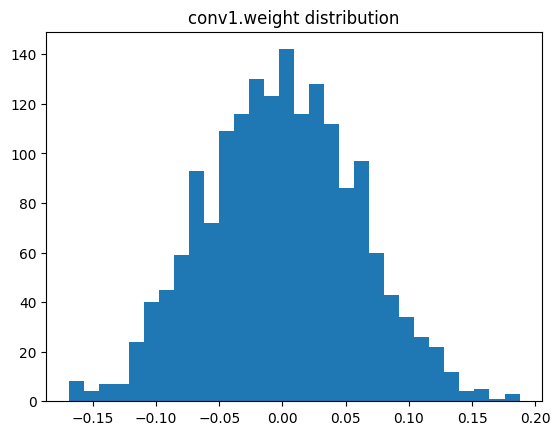

Name:  conv1.bias Mean:  0.0 Std:  0.0


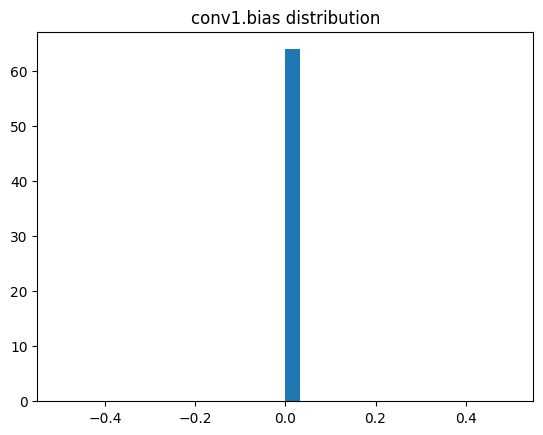

Name:  conv2.weight Mean:  0.00012831372441723943 Std:  0.05889374017715454


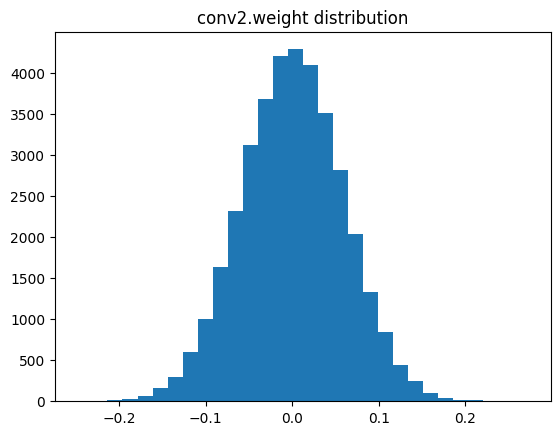

Name:  conv2.bias Mean:  0.0 Std:  0.0


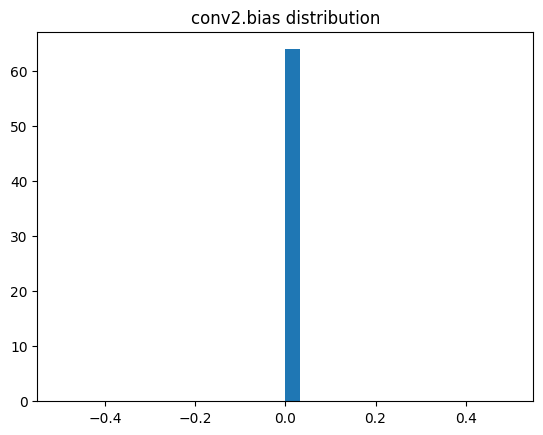

Name:  conv3.weight Mean:  -1.9997512936242856e-05 Std:  0.04166922718286514


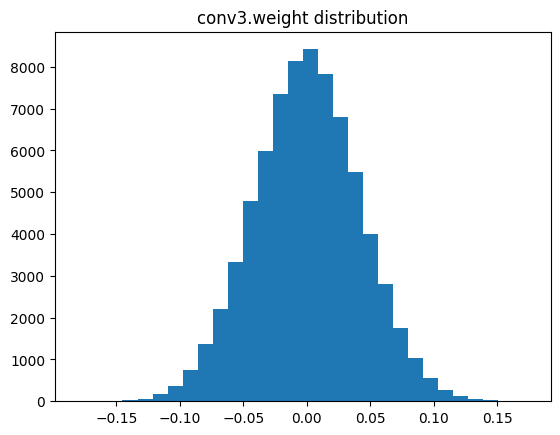

Name:  conv3.bias Mean:  0.0 Std:  0.0


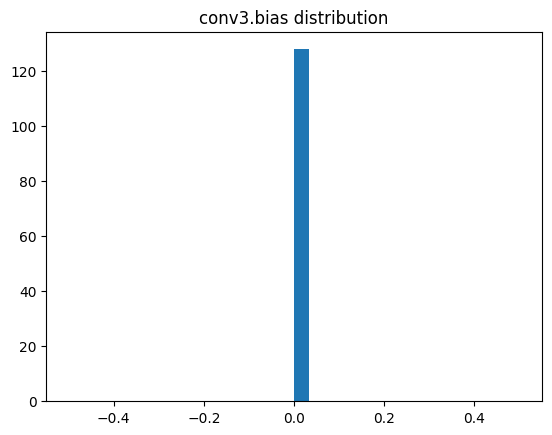

Name:  conv4.weight Mean:  -0.00010965205729007721 Std:  0.04154134541749954


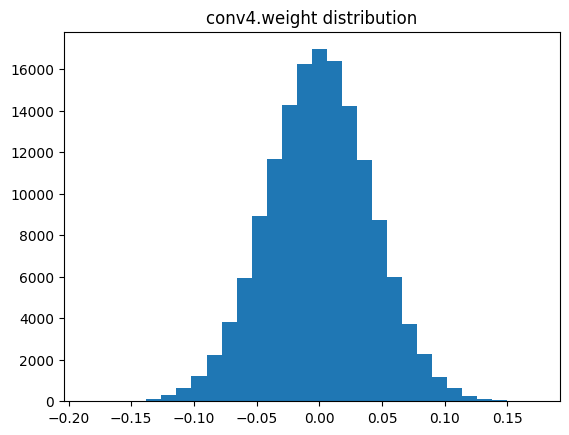

Name:  conv4.bias Mean:  0.0 Std:  0.0


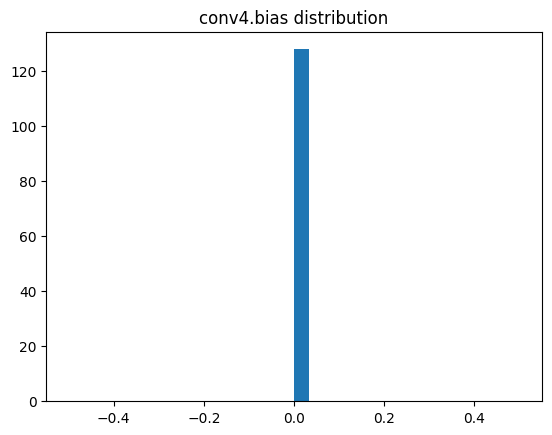

Name:  conv5.weight Mean:  2.1388284949352965e-05 Std:  0.029494868591427803


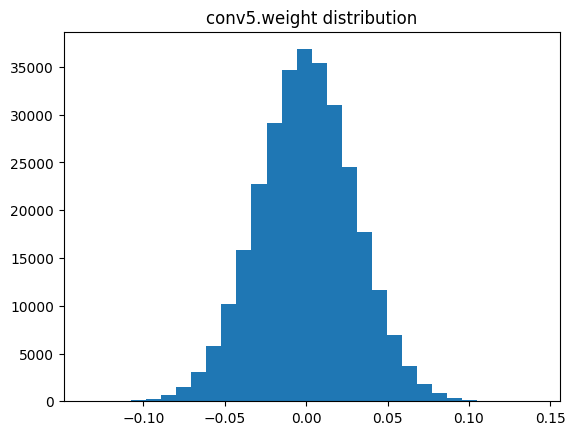

Name:  conv5.bias Mean:  0.0 Std:  0.0


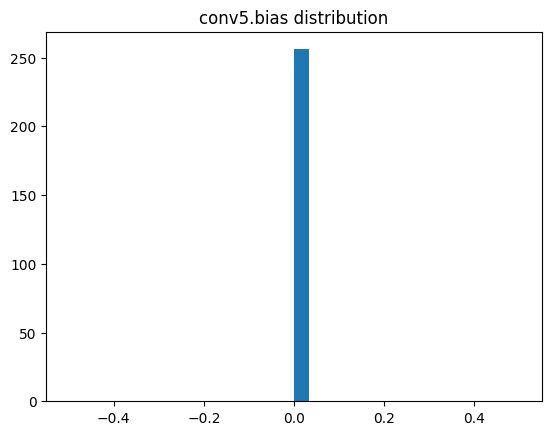

Name:  conv6.weight Mean:  -1.3810215023113415e-05 Std:  0.029486969113349915


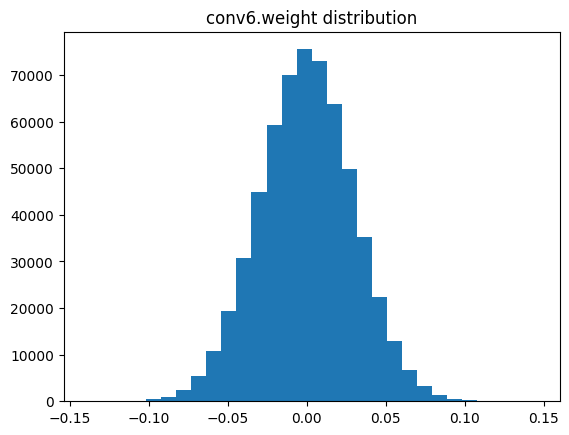

Name:  conv6.bias Mean:  0.0 Std:  0.0


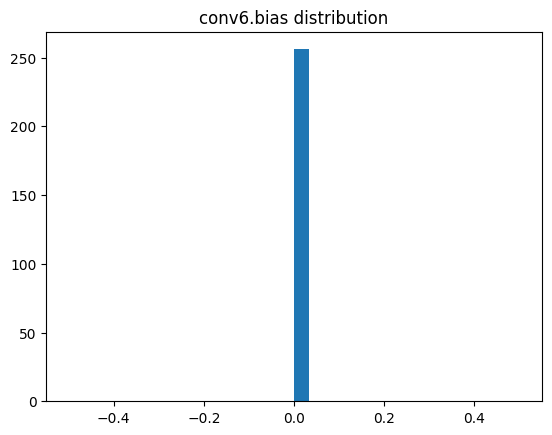

Name:  conv7.weight Mean:  -3.433594247326255e-05 Std:  0.029469892382621765


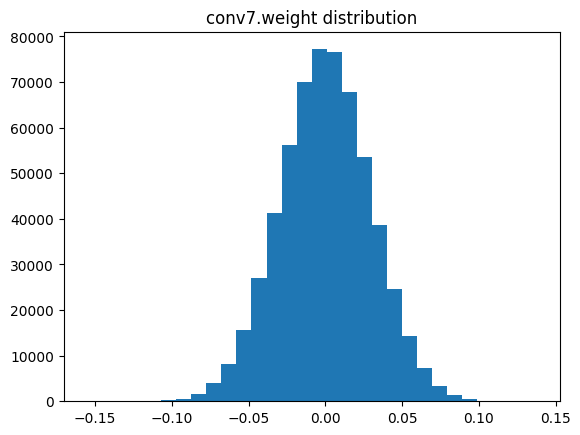

Name:  conv7.bias Mean:  0.0 Std:  0.0


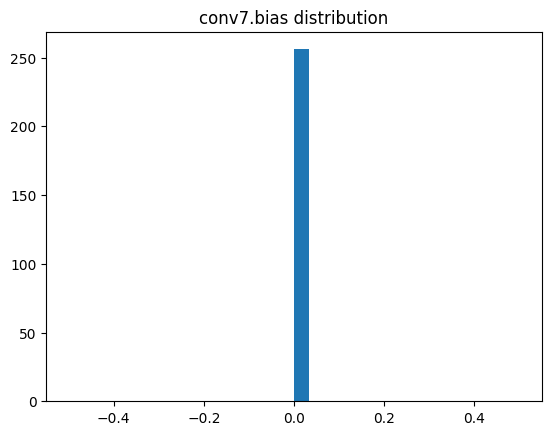

Name:  conv8.weight Mean:  4.6747413762204815e-06 Std:  0.020816277712583542


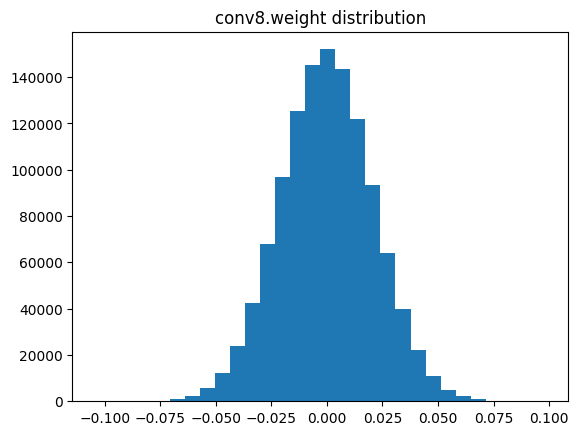

Name:  conv8.bias Mean:  0.0 Std:  0.0


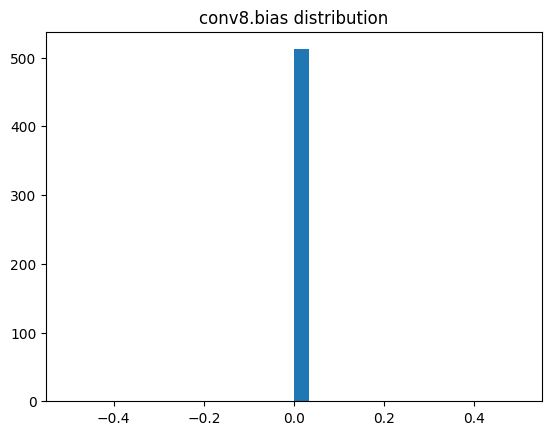

Name:  conv9.weight Mean:  4.4913699071003066e-07 Std:  0.020826689898967743


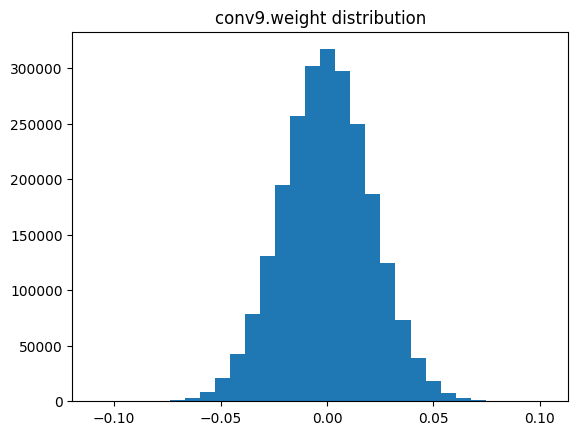

Name:  conv9.bias Mean:  0.0 Std:  0.0


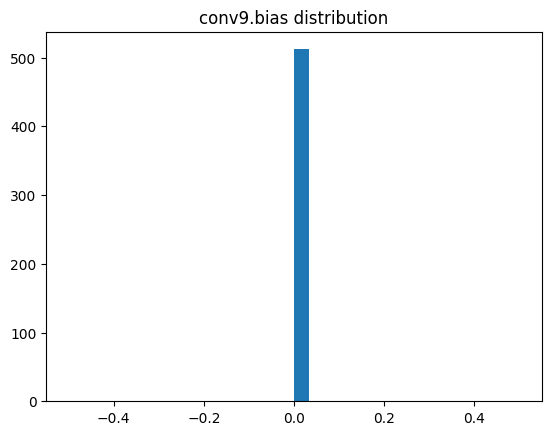

Name:  conv10.weight Mean:  4.780778908752836e-06 Std:  0.020837919786572456


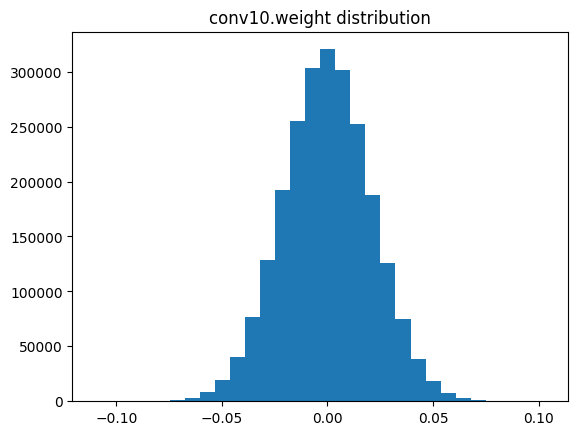

Name:  conv10.bias Mean:  0.0 Std:  0.0


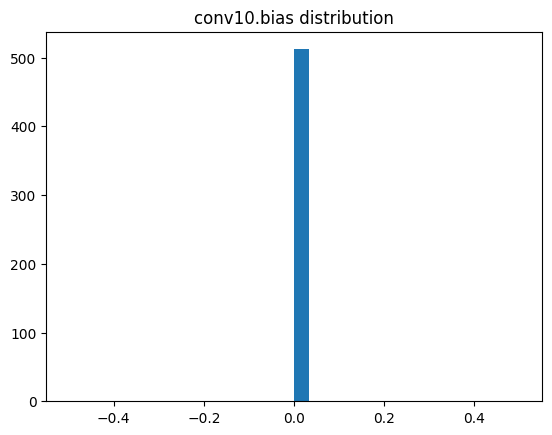

Name:  conv11.weight Mean:  -7.757309504086152e-06 Std:  0.020835936069488525


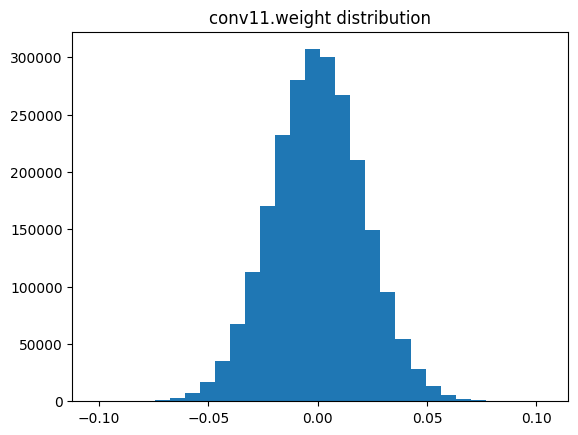

Name:  conv11.bias Mean:  0.0 Std:  0.0


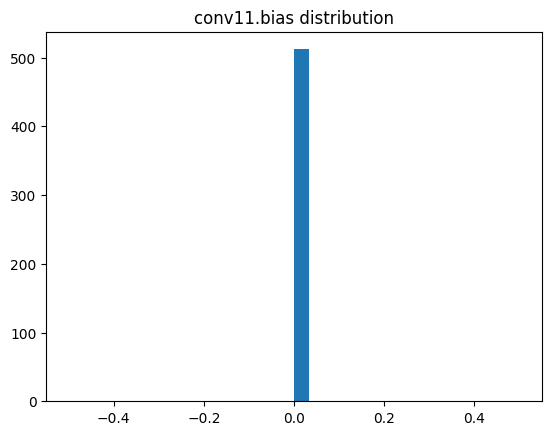

Name:  conv12.weight Mean:  1.3081805263936985e-05 Std:  0.02083807997405529


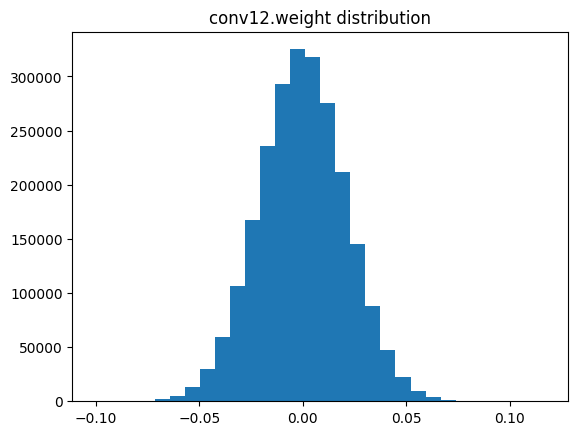

Name:  conv12.bias Mean:  0.0 Std:  0.0


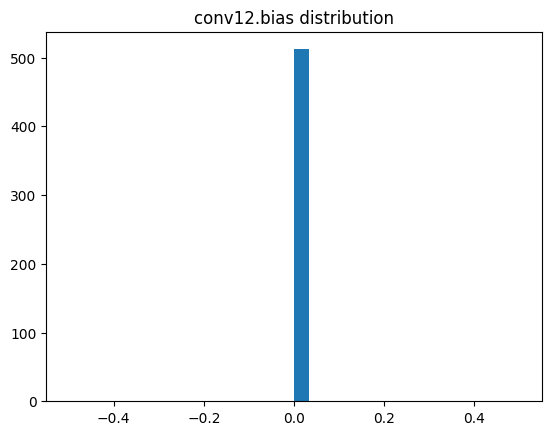

Name:  conv13.weight Mean:  8.065032488957513e-06 Std:  0.020834220573306084


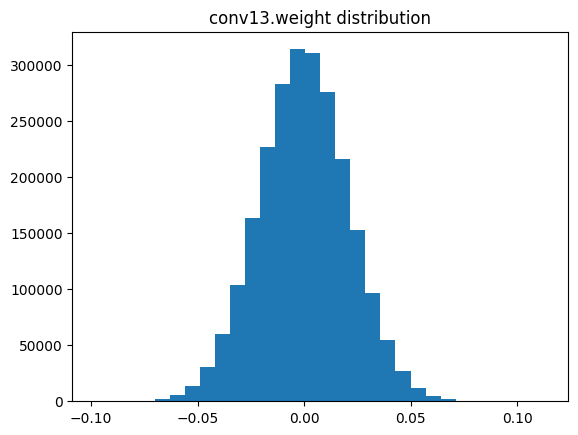

Name:  conv13.bias Mean:  0.0 Std:  0.0


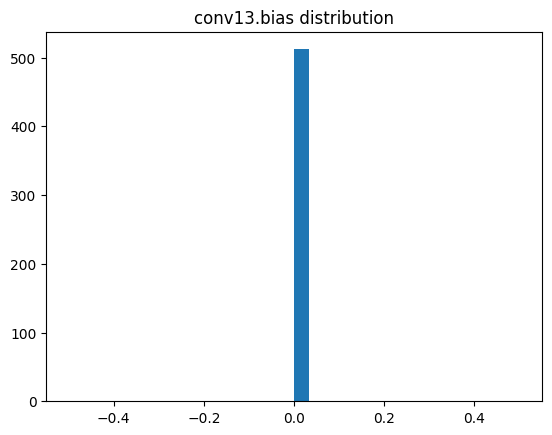

Name:  fc1.weight Mean:  -1.5610364698659396e-06 Std:  0.022094130516052246


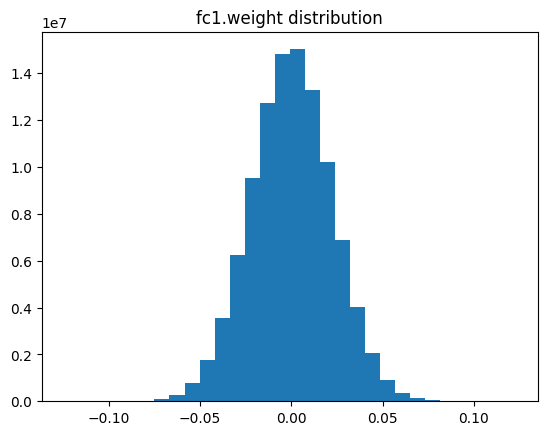

Name:  fc1.bias Mean:  0.0 Std:  0.0


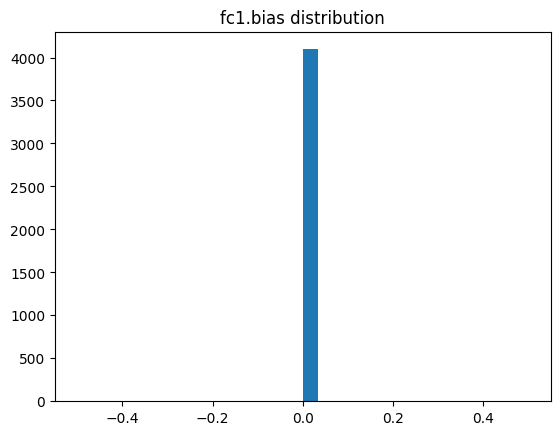

Name:  fc2.weight Mean:  4.432690730027389e-06 Std:  0.02209886722266674


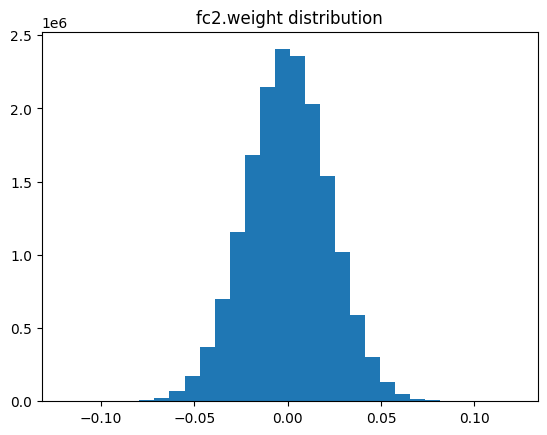

Name:  fc2.bias Mean:  0.0 Std:  0.0


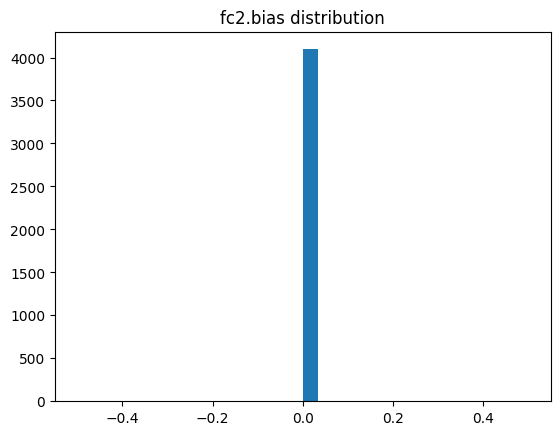

Name:  fc3.weight Mean:  -6.528028734464897e-06 Std:  0.04472370818257332


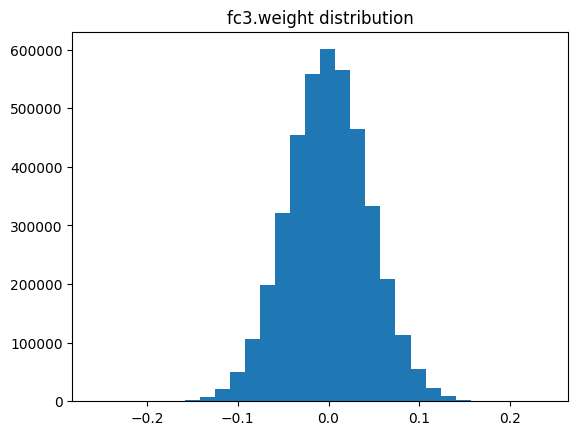

Name:  fc3.bias Mean:  0.0 Std:  0.0


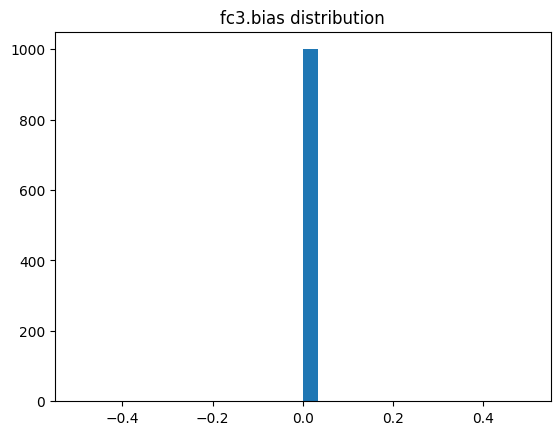

In [4]:
def check_weights(model):
    for name,param in model.named_parameters():
        print("Name: ",name,
              "Mean: ",param.mean().item(),
              "Std: ",param.std().item())

        plt.hist(param.detach().cpu().numpy().flatten(),bins=30)
        plt.title(f"{name} distribution")
        plt.show()
    
    
check_weights(model)

In [5]:
# x = torch.randn([1,3,227,227])
# model(x)

In [6]:
from torchvision.datasets import MNIST
import torchvision.transforms as T
from torch.utils.data import DataLoader


In [7]:
transformer = T.Compose([
    T.Resize([227,227]),
    T.ToTensor(),
    T.Lambda(lambda x: x[0].repeat(3,1,1))
])

In [8]:
train_dataset = MNIST("./data",True,transformer,download=True)
test_dataset = MNIST("./data",False,transformer,download=True)


In [9]:
train_dataloader = DataLoader(train_dataset,4,True)
test_dataloader = DataLoader(test_dataset  ,4,True)


In [15]:
model = VggNet()
model.train()


VggNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv11): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding

In [16]:
import torch.optim as optim

# optmizer = optim.Adam(model.parameters(),lr=0.00001)
optmizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)


In [17]:
criterion = nn.CrossEntropyLoss()

In [18]:
model.train()

num_epochs = 15


for epoch in range(num_epochs):
    for index , (xtrain,ytrain) in enumerate(train_dataloader):
        optmizer.zero_grad()
        output = model(xtrain)
        loss = criterion(output,ytrain)
        loss.backward()
        optmizer.step()
        
        
        print(f"Epoch {epoch+1}/{num_epochs} , iteration {index}, Loss: {loss}")
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch 1/15 , iteration 0, Loss: 7.710701942443848
Epoch [1/15], Loss: 7.7107
Epoch 1/15 , iteration 1, Loss: 7.357913970947266
Epoch [1/15], Loss: 7.3579
Epoch 1/15 , iteration 2, Loss: 6.8821916580200195
Epoch [1/15], Loss: 6.8822
Epoch 1/15 , iteration 3, Loss: 6.535563945770264
Epoch [1/15], Loss: 6.5356
Epoch 1/15 , iteration 4, Loss: 6.918876647949219
Epoch [1/15], Loss: 6.9189
Epoch 1/15 , iteration 5, Loss: 6.413806915283203
Epoch [1/15], Loss: 6.4138
Epoch 1/15 , iteration 6, Loss: 6.839300632476807
Epoch [1/15], Loss: 6.8393
Epoch 1/15 , iteration 7, Loss: 6.246272087097168
Epoch [1/15], Loss: 6.2463
Epoch 1/15 , iteration 8, Loss: 6.088740348815918
Epoch [1/15], Loss: 6.0887
Epoch 1/15 , iteration 9, Loss: 6.090889930725098
Epoch [1/15], Loss: 6.0909
Epoch 1/15 , iteration 10, Loss: 5.478940010070801
Epoch [1/15], Loss: 5.4789
Epoch 1/15 , iteration 11, Loss: 4.897302150726318
Epoch [1/15], Loss: 4.8973
Epoch 1/15 , iteration 12, Loss: 5.957530975341797
Epoch [1/15], Loss: 5.

KeyboardInterrupt: 

In [61]:
from torchmetrics.classification import Accuracy
from tqdm import tqdm

In [62]:
accuracy = Accuracy("multiclass",num_classes=10)

In [63]:
model.eval()

with torch.no_grad():
    for xtest,ytest in tqdm(test_dataloader):
        output = model(xtest)
        softmax = nn.Softmax(dim=1)
        probs = softmax(output)
        
        pred_labels=torch.max(probs,dim=1).indices
        
        accuracy.update(pred_labels,ytest)
        

100%|███████████████████████████████████████████| 2500/2500 [16:13<00:00,  2.57it/s]


In [65]:
accuracy.compute()

tensor(0.7722)